In [2]:
import pandas as pd

df = pd.read_csv(r"D:\5th Sem\ML\DATASET\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

display(df.head())

df.info()

display(df.describe())

display(df.nunique())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Preprocess the data

### Subtask:
Encode categorical variables, handle missing values, and scale features.


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())
display(y.head())

C:\Users\dipes\AppData\Local\Temp\ipykernel_10308\1316069285.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994971,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173876,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.960399,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195400,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.941193,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Train a decision tree classifier

### Subtask:
Train a Decision Tree classifier and visualize the tree structure.


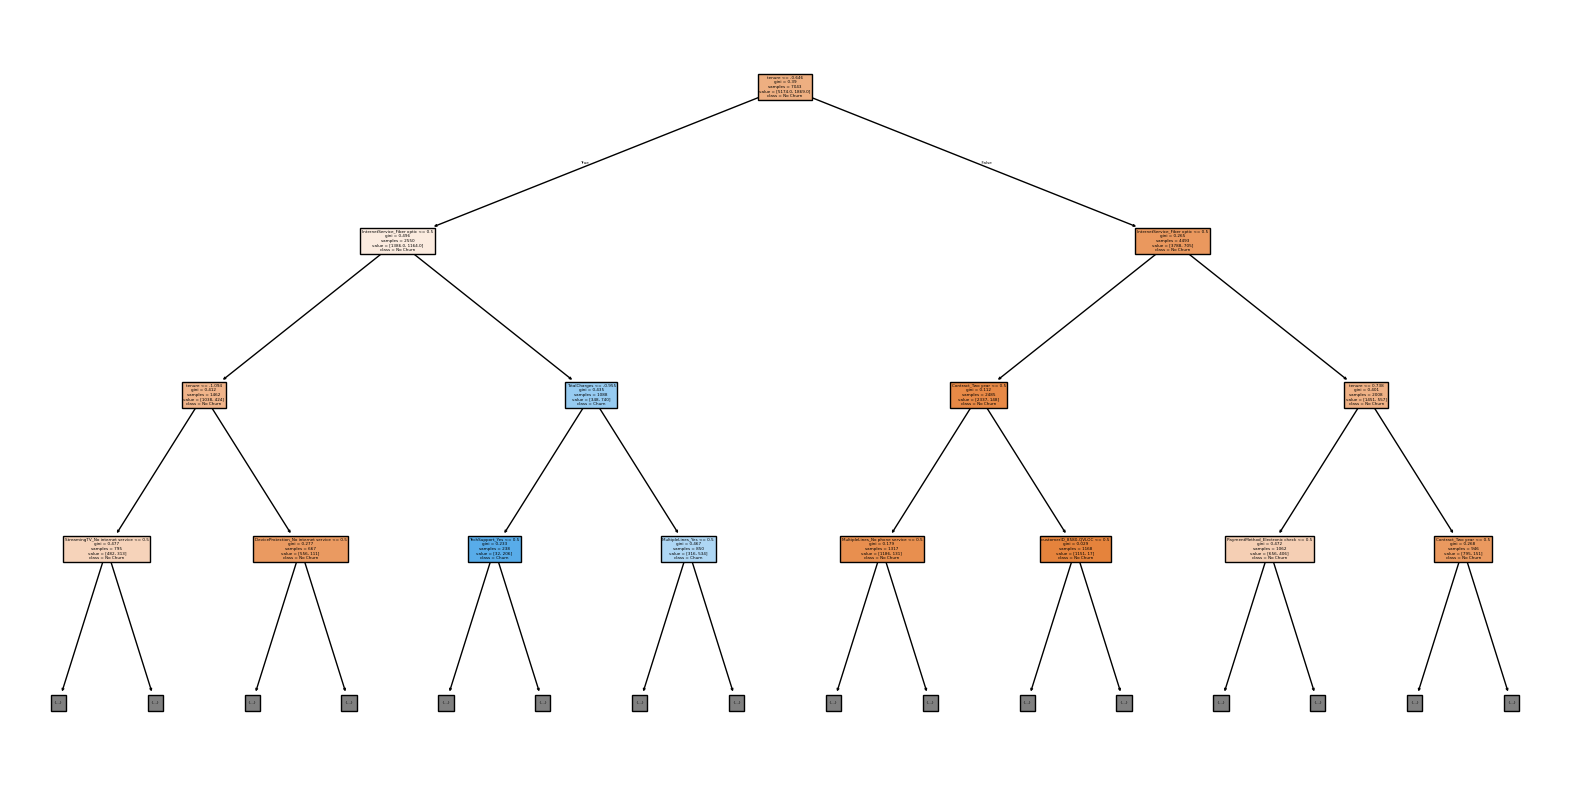

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, max_depth=3, feature_names=X.columns.tolist(), class_names=['No Churn', 'Churn'], filled=True)
plt.show()

## Train a random forest classifier

### Subtask:
Train a Random Forest classifier and extract feature importance.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)

feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)

top_features = feature_importance.sort_values(ascending=False)
display(top_features.head(10))

,0
tenure,0.101782
TotalCharges,0.096932
MonthlyCharges,0.081551
InternetService_Fiber optic,0.028827
PaymentMethod_Electronic check,0.023945
Contract_Two year,0.023204
OnlineSecurity_Yes,0.020504
TechSupport_Yes,0.019137
PaperlessBilling_Yes,0.018110
Contract_One year,0.017379


## Compare model performance

### Subtask:
Evaluate and compare the performance of both models using accuracy, precision, recall, F1-score, and confusion matrix.


Decision Tree Model Evaluation:
Accuracy: 0.7722
Precision: 0.5813
Recall: 0.4987
F1-score: 0.5368

Random Forest Model Evaluation:
Accuracy: 0.8006
Precision: 0.6855
Recall: 0.4558
F1-score: 0.5475

Decision Tree Confusion Matrix:


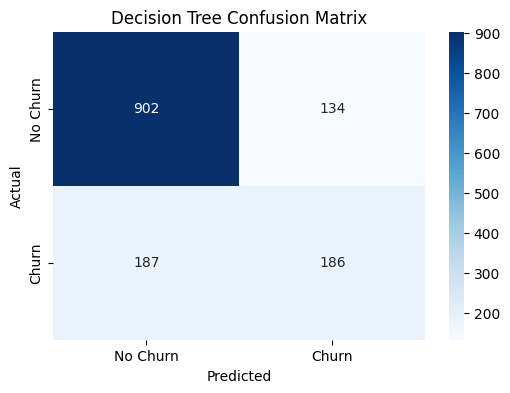


Random Forest Confusion Matrix:


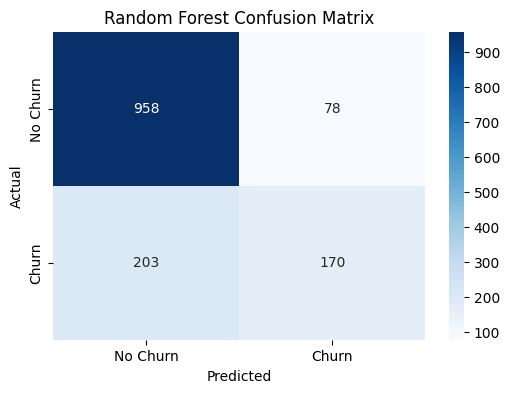

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

print("\nDecision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

print("\nRandom Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Address overfitting

### Subtask:
Use cross-validation and hyperparameter tuning to address overfitting.


In [ ]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='f1')
print("Decision Tree Cross-Validation F1-scores:")
print(f"Mean: {dt_cv_scores.mean():.4f}")
print(f"Standard Deviation: {dt_cv_scores.std():.4f}")

rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1')

print("\nRandom Forest Cross-Validation F1-scores:")
print(f"Mean: {rf_cv_scores.mean():.4f}")
print(f"Standard Deviation: {rf_cv_scores.std():.4f}")

Decision Tree Cross-Validation F1-scores:
Mean: 0.5200
Standard Deviation: 0.0163

Random Forest Cross-Validation F1-scores:
Mean: 0.5308
Standard Deviation: 0.0305


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Best hyperparameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


## Interpret the results

### Subtask:
Interpret the model results, including feature importance, to make data-driven recommendations.

In [ ]:
print("Top 10 Important Features for Churn Prediction:")
display(top_features.head(10))

Top 10 Important Features for Churn Prediction:


,0
tenure,0.101782
TotalCharges,0.096932
MonthlyCharges,0.081551
InternetService_Fiber optic,0.028827
PaymentMethod_Electronic check,0.023945
Contract_Two year,0.023204
OnlineSecurity_Yes,0.020504
TechSupport_Yes,0.019137
PaperlessBilling_Yes,0.018110
Contract_One year,0.017379


In [ ]:
import pandas as pd

df = pd.read_csv(r"D:\5th Sem\ML\DATASET\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

display(df.head())

df.info()

display(df.describe())

display(df.nunique())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())
display(y.head())

/tmp/ipython-input-3523598749.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994971,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173876,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.960399,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195400,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.941193,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


,Churn
0,0
1,0
2,1
3,0
4,1


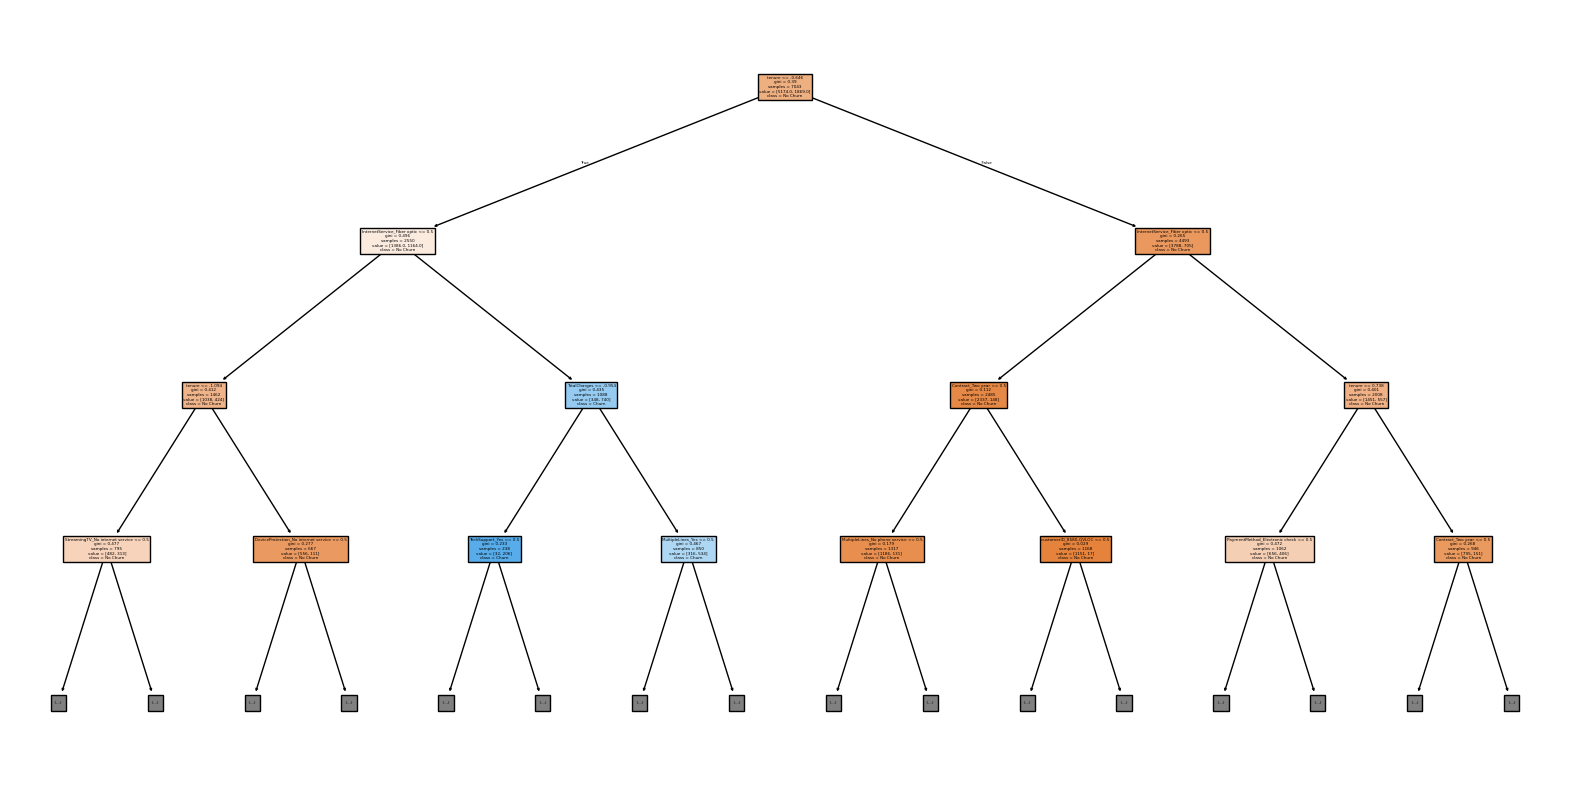

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, max_depth=3, feature_names=X.columns.tolist(), class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)

feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)

top_features = feature_importance.sort_values(ascending=False)
display(top_features.head(10))

,0
tenure,0.101782
TotalCharges,0.096932
MonthlyCharges,0.081551
InternetService_Fiber optic,0.028827
PaymentMethod_Electronic check,0.023945
Contract_Two year,0.023204
OnlineSecurity_Yes,0.020504
TechSupport_Yes,0.019137
PaperlessBilling_Yes,0.018110
Contract_One year,0.017379


Decision Tree Model Evaluation:
Accuracy: 0.7722
Precision: 0.5813
Recall: 0.4987
F1-score: 0.5368

Random Forest Model Evaluation:
Accuracy: 0.8006
Precision: 0.6855
Recall: 0.4558
F1-score: 0.5475

Decision Tree Confusion Matrix:


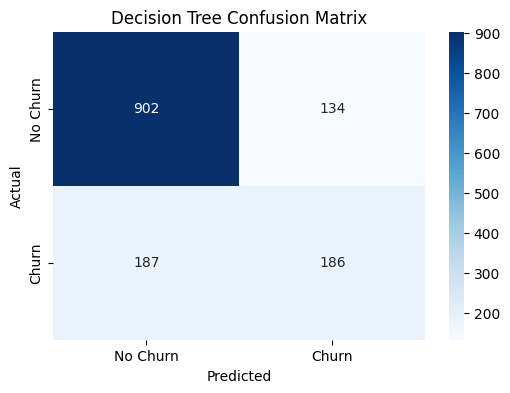


Random Forest Confusion Matrix:


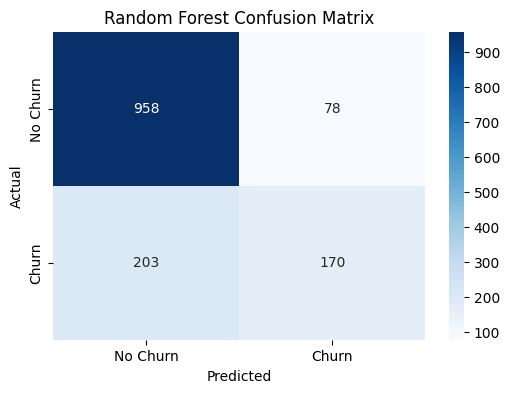

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

print("\nDecision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

print("\nRandom Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='f1')
print("Decision Tree Cross-Validation F1-scores:")
print(f"Mean: {dt_cv_scores.mean():.4f}")
print(f"Standard Deviation: {dt_cv_scores.std():.4f}")

rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1')

print("\nRandom Forest Cross-Validation F1-scores:")
print(f"Mean: {rf_cv_scores.mean():.4f}")
print(f"Standard Deviation: {rf_cv_scores.std():.4f}")

Decision Tree Cross-Validation F1-scores:
Mean: 0.5200
Standard Deviation: 0.0163

Random Forest Cross-Validation F1-scores:
Mean: 0.5308
Standard Deviation: 0.0305


## Interpret the results

### Subtask:
Interpret the model results, including feature importance, to make data-driven recommendations.

In [10]:
print("Top 10 Important Features for Churn Prediction:")
display(top_features.head(10))

Top 10 Important Features for Churn Prediction:


tenure                            0.102107
TotalCharges                      0.096663
MonthlyCharges                    0.081662
InternetService_Fiber optic       0.028951
PaymentMethod_Electronic check    0.023853
Contract_Two year                 0.023171
OnlineSecurity_Yes                0.020496
TechSupport_Yes                   0.019001
PaperlessBilling_Yes              0.018043
Contract_One year                 0.017389
dtype: float64